In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [28]:
try:
    df_iris = pd.read_csv('archive/IRIS.csv')
except FileNotFoundError:
    print("File 'iris_dataset.csv' not found. Using scikit-learn’s built-in Iris dataset.")
    iris = load_iris()
    df_iris = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                           columns=iris['feature_names'] + ['species'])
    df_iris['species'] = df_iris['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
    df_iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [29]:
print("--- 1. Load and Explore Data ---")
print(df_iris.head())
print(f"Data shape: {df_iris.shape}\n")

X = df_iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df_iris['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

--- 1. Load and Explore Data ---
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
Data shape: (150, 5)



In [ ]:

print("--- 2. Training and Test Set Sizes ---")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}\n")

# svc = SVC(random_state=42)
svc = SVC(C=1, kernel='rbf', gamma='scale')

#C [0.1, 1, 10, 100]
# 0.1 chấp nhận sai số lớn hơn
# 1 cân bằng
# 10, 100 chấp nhận sai số nhỏ hơn

svc.fit(X_train_scaled, y_train)


--- 2. Training and Test Set Sizes ---
X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)



SVC(C=1, gamma=0.0025)

In [235]:
print("--- 3. KNN Model Training Complete ---\n")

y_pred = svc.predict(X_test_scaled)

--- 3. KNN Model Training Complete ---



In [236]:
print("--- 4. Prediction Results on Test Set ---")
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results_df.head())
print("\n")

--- 4. Prediction Results on Test Set ---
              Actual        Predicted
73   Iris-versicolor  Iris-versicolor
18       Iris-setosa      Iris-setosa
118   Iris-virginica   Iris-virginica
78   Iris-versicolor  Iris-versicolor
76   Iris-versicolor  Iris-versicolor




In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("--- 5. Confusion Matrix ---")
print(cm)
print("\n")

accuracy = accuracy_score(y_test, y_pred)

--- 5. Confusion Matrix ---
[[10  0  0]
 [ 0  9  0]
 [ 0  9  2]]




--- 6. Model Accuracy ---
Accuracy: 0.70



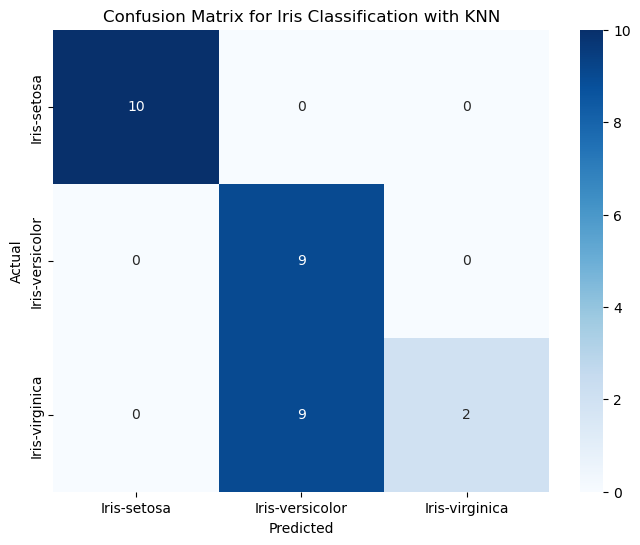

In [238]:
print("--- 6. Model Accuracy ---")
print(f"Accuracy: {accuracy:.2f}\n")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=svc.classes_, yticklabels=svc.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Iris Classification with KNN')
plt.show()

In [239]:
print("--- 7. Results Analysis ---")
if accuracy > 0.95:
    print("KNN model achieved very high accuracy, showing good classification capability for Iris species.")
elif accuracy > 0.8:
    print("KNN model achieved good accuracy, which may be acceptable for this problem.")
else:
    print("KNN model might need further optimization (e.g., changing n_neighbors, data normalization).")

print(f"\nNumber of correctly classified samples: {np.trace(cm)}")
print(f"Number of misclassified samples: {np.sum(cm) - np.trace(cm)}")

--- 7. Results Analysis ---
KNN model might need further optimization (e.g., changing n_neighbors, data normalization).

Number of correctly classified samples: 21
Number of misclassified samples: 9


In [240]:


print("\n--- 8. Prediction for a New Iris Sample ---")
new_flower_features = pd.DataFrame([[5.0, 3.5, 1.3, 0.2]],
                                   columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

new_flower_features_scaled = scaler.transform(new_flower_features)

predicted_species = svc.predict(new_flower_features_scaled)
print(f"New flower features: Sepal Length={new_flower_features.iloc[0,0]}, "
      f"Sepal Width={new_flower_features.iloc[0,1]}, "
      f"Petal Length={new_flower_features.iloc[0,2]}, "
      f"Petal Width={new_flower_features.iloc[0,3]}")
print(f"Predicted species: {predicted_species[0]}")


--- 8. Prediction for a New Iris Sample ---
New flower features: Sepal Length=5.0, Sepal Width=3.5, Petal Length=1.3, Petal Width=0.2
Predicted species: Iris-setosa
